In [34]:
import matplotlib.pyplot as plt
import numpy as np


def make_bar_chart(frozen, name):
    datasets = ("BACE", "BBBP", "HIV", "ClinTox")
    x = np.arange(len(datasets))
    width = 0.15
    multiplier = 0

    fig, ax = plt.subplots(layout="constrained", figsize=(12, 6))

    for model, dataset in frozen.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, dataset, width, label=model)
        ax.bar_label(rects, padding=2)
        multiplier += 1

    ax.set_ylabel("ROC_AUC")
    ax.set_title(name)
    ax.set_xticks(x + width, datasets)
    ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
    ax.set_ylim(0, 1.1)

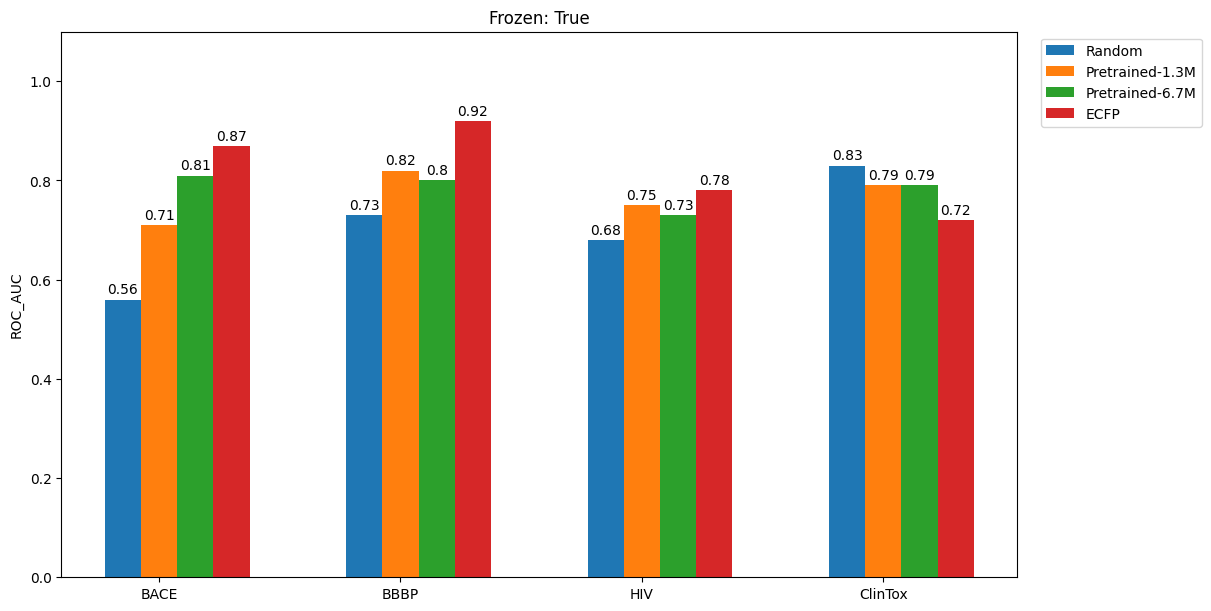

In [11]:
frozen_true = {
    "Random": (0.56, 0.73, 0.68, 0.83),
    "Pretrained-1.3M": (0.71, 0.82, 0.75, 0.79),
    "Pretrained-6.7M": (0.81, 0.80, 0.73, 0.79),
    "ECFP": (0.87, 0.92, 0.78, 0.72)
}

make_bar_chart(frozen_true, "Frozen: True")

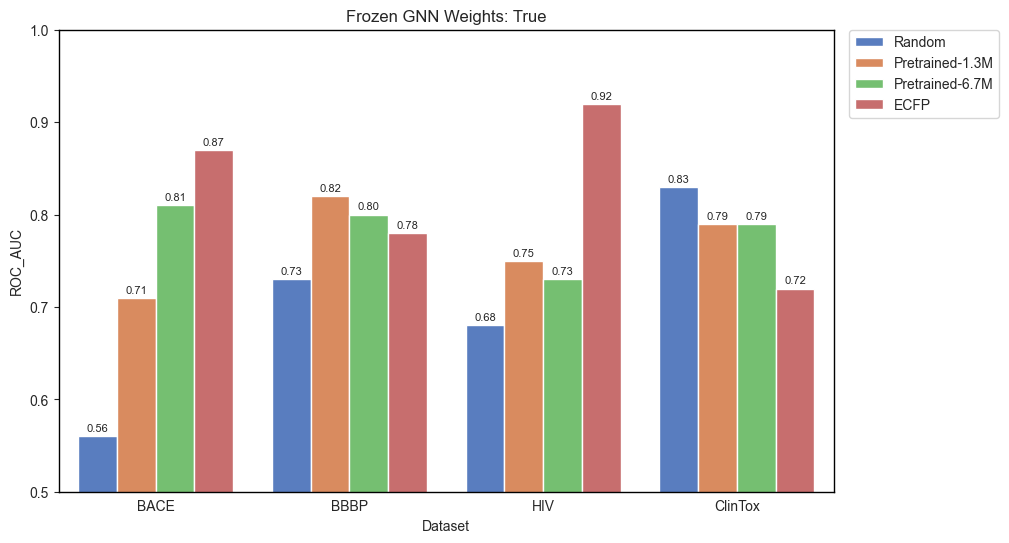

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.DataFrame([
    {"Model": "Random", "ROC_AUC": 0.56, "Dataset": "BACE"},
    {"Model": "Random", "ROC_AUC": 0.73, "Dataset": "BBBP"},
    {"Model": "Random", "ROC_AUC": 0.68, "Dataset": "HIV"},
    {"Model": "Random", "ROC_AUC": 0.83, "Dataset": "ClinTox"},
    {"Model": "Pretrained-1.3M", "ROC_AUC": 0.71, "Dataset": "BACE"},
    {"Model": "Pretrained-1.3M", "ROC_AUC": 0.82, "Dataset": "BBBP"},
    {"Model": "Pretrained-1.3M", "ROC_AUC": 0.75, "Dataset": "HIV"},
    {"Model": "Pretrained-1.3M", "ROC_AUC": 0.79, "Dataset": "ClinTox"},
    {"Model": "Pretrained-6.7M", "ROC_AUC": 0.81, "Dataset": "BACE"},
    {"Model": "Pretrained-6.7M", "ROC_AUC": 0.80, "Dataset": "BBBP"},
    {"Model": "Pretrained-6.7M", "ROC_AUC": 0.73, "Dataset": "HIV"},
    {"Model": "Pretrained-6.7M", "ROC_AUC": 0.79, "Dataset": "ClinTox"},
    {"Model": "ECFP", "ROC_AUC": 0.87, "Dataset": "BACE"},
    {"Model": "ECFP", "ROC_AUC": 0.92, "Dataset": "HIV"},
    {"Model": "ECFP", "ROC_AUC": 0.78, "Dataset": "BBBP"},
    {"Model": "ECFP", "ROC_AUC": 0.72, "Dataset": "ClinTox"},
])
plt.figure(figsize=(10,6))

sns.set_style(style="ticks")
sns.barplot(df, x="Dataset", y="ROC_AUC", hue="Model", palette="muted")
plt.title("Frozen GNN Weights: True")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.ylim(0.5, 1)
ax = plt.gca()
ax.tick_params(axis='x', which='both', bottom=False, pad=2)
for spine in ax.spines.values():
    spine.set_linewidth(1)           # Border width
    spine.set_edgecolor("black")     #

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=2, fontsize=8)

plt.savefig("plot.svg", format="svg", transparent=True, bbox_inches="tight")

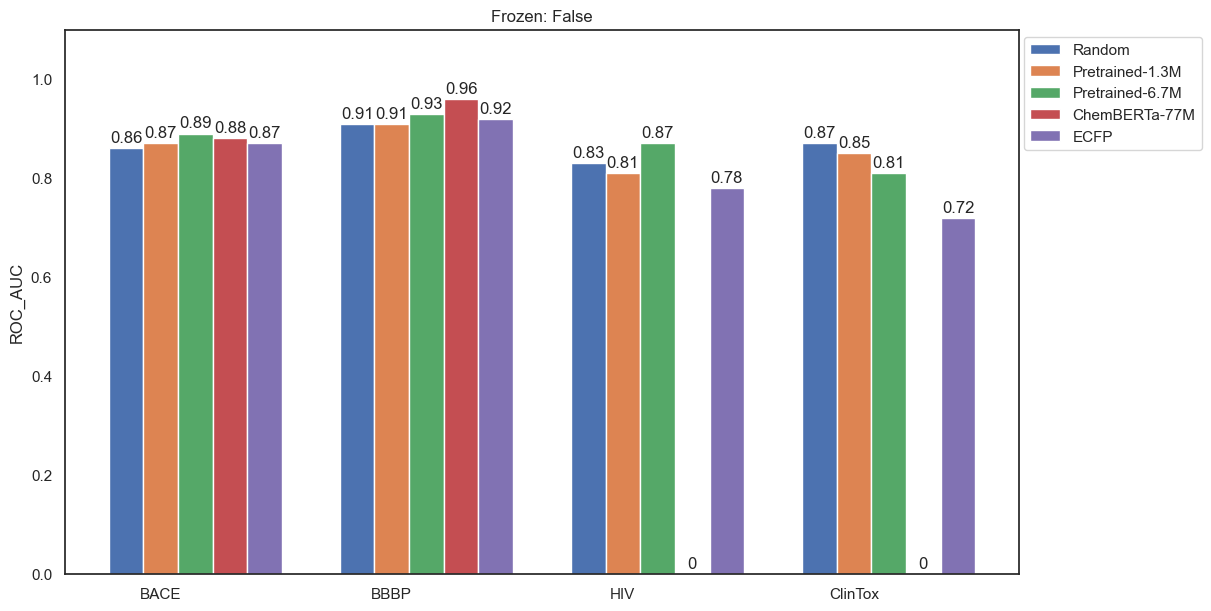

In [35]:
frozen_false = {
    "Random": (0.86, 0.91, 0.83, 0.87),
    "Pretrained-1.3M": (0.87, 0.91, 0.81, 0.85),
    "Pretrained-6.7M": (0.89, 0.93, 0.87, 0.81),
    "ChemBERTa-77M": (0.88, 0.96, 0, 0),
    "ECFP": (0.87, 0.92, 0.78, 0.72)
}

make_bar_chart(frozen_false, "Frozen: False")

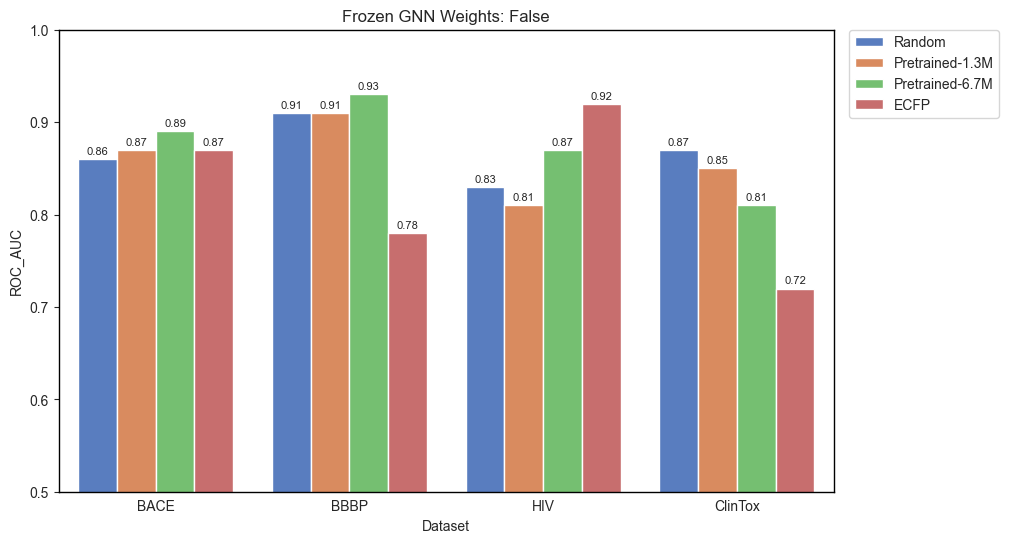

In [18]:
df_non = pd.DataFrame([
    {"Model": "Random", "ROC_AUC": 0.86, "Dataset": "BACE"},
    {"Model": "Random", "ROC_AUC": 0.91, "Dataset": "BBBP"},
    {"Model": "Random", "ROC_AUC": 0.83, "Dataset": "HIV"},
    {"Model": "Random", "ROC_AUC": 0.87, "Dataset": "ClinTox"},
    {"Model": "Pretrained-1.3M", "ROC_AUC": 0.87, "Dataset": "BACE"},
    {"Model": "Pretrained-1.3M", "ROC_AUC": 0.91, "Dataset": "BBBP"},
    {"Model": "Pretrained-1.3M", "ROC_AUC": 0.81, "Dataset": "HIV"},
    {"Model": "Pretrained-1.3M", "ROC_AUC": 0.85, "Dataset": "ClinTox"},
    {"Model": "Pretrained-6.7M", "ROC_AUC": 0.89, "Dataset": "BACE"},
    {"Model": "Pretrained-6.7M", "ROC_AUC": 0.93, "Dataset": "BBBP"},
    {"Model": "Pretrained-6.7M", "ROC_AUC": 0.87, "Dataset": "HIV"},
    {"Model": "Pretrained-6.7M", "ROC_AUC": 0.81, "Dataset": "ClinTox"},
    {"Model": "ECFP", "ROC_AUC": 0.87, "Dataset": "BACE"},
    {"Model": "ECFP", "ROC_AUC": 0.92, "Dataset": "HIV"},
    {"Model": "ECFP", "ROC_AUC": 0.78, "Dataset": "BBBP"},
    {"Model": "ECFP", "ROC_AUC": 0.72, "Dataset": "ClinTox"},
])
plt.figure(figsize=(10,6))

sns.set_style(style="ticks")
sns.barplot(df_non, x="Dataset", y="ROC_AUC", hue="Model", palette="muted")
plt.title("Frozen GNN Weights: False")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
ax = plt.gca()
ax.set_ylim(0.5, 1)
ax.tick_params(axis='x', which='both', bottom=False, pad=2)
for spine in ax.spines.values():
    spine.set_linewidth(1)           # Border width
    spine.set_edgecolor("black")     #

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=2, fontsize=8)

plt.savefig("plot_not_frozen.svg", format="svg", transparent=True, bbox_inches="tight")